<a href="https://colab.research.google.com/github/Mamadou2025/Pseudo-Dual-Rickart-Code-Tester/blob/main/Pseudo_dual_Rickart_Gcd_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from itertools import product

def gcd(x, y):
    if x == 0 and y == 0:
        return 0
    while y != 0:
        x, y = y, x % y
    return abs(x)



def is_endomorphism(f, M):
    for x, y in product(M, repeat=2):
        if f[gcd(x, y)] != gcd(f[x], f[y]):
            return False
    return True

def is_idempotent(f, M):
    for x in M:
        if f[f[x]] != f[x]:
            return False
    return True

def extended_image(f, M):
    Im_M_f = set()
    for y in M:
        for x1 in M:
            for x2 in M:
                if gcd(y, f[x1]) == f[x2]:
                    Im_M_f.add(y)
                    break
    return Im_M_f



def all_functions(n):
    M = set(range(n + 1))
    S = []
    idempotents = []

    # Generate and store all valid endomorphisms
    for f_vals in product(range(n + 1), repeat=n + 1):
        f = {i: f_vals[i] for i in range(n + 1)}
        if is_endomorphism(f, M) and f[0] == 0:
            S.append(f)
            if is_idempotent(f, M):
                idempotents.append(f)

    # Check if M is Pseudo Dual Rickart type 2
    pseudo_dual_type_2 = True
    for f_i in S:
        im_f_i = {f_i[x] for x in M}
        found_idempotent = False
        for f_j in idempotents:
            if im_f_i == {f_j[x] for x in M}:
                found_idempotent = True
                break
        if not found_idempotent:
            pseudo_dual_type_2 = False
            break

    # Conclusion about M being Pseudo Dual Rickart type 2
    if pseudo_dual_type_2:
        print("M is Pseudo Dual Rickart of type 2.")

        # Check if M is Pseudo Dual Rickart type 1
        pseudo_dual_type_1 = False
        for f_i in S:
            im_f_i = {f_i[x] for x in M}
            Im_M_f_i = extended_image(f_i, M)
            if im_f_i != Im_M_f_i:
                pseudo_dual_type_1 = True
                break

        if pseudo_dual_type_1:
            print("M is Pseudo Dual Rickart of type 1.")
        else:
            print("M is not Pseudo Dual Rickart of type 1.")
    else:
        print("M is not Pseudo Dual Rickart of type 2.")



# Using the generalized code
n = 2  # You can change the value of n here
all_functions(n)


M is Pseudo Dual Rickart of type 2.
M is Pseudo Dual Rickart of type 1.



HOW TO USE THE CODE
Choose your value of n as in the image
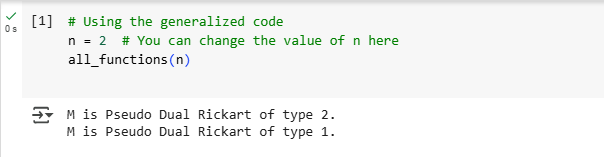
This code analyses and verifies whether or not given examples of semimodules are pseudo dual Rickart semimodules.

This Python implementation is designed to test the dual weak Rickart property for semimodules over natural numbers using the GCD operation. The script leverages the combinatorial functionality of the itertools library to analyze all possible functions on the finite set M = {0, 1, ..., n}, where n is a user-defined input.

Functional Highlights:
1. Endomorphism Validation: Functions f: M → M are filtered based on two criteria:
   - f(0) = 0, ensuring that zero maps to zero.
   - Preservation of the GCD operation: f(gcd(x, y)) = gcd(f(x), f(y)), for all x, y ∈ M.

2. Idempotency Check: The function checks if f(f(x)) = f(x), identifying idempotent functions within the set of valid endomorphisms.

3. Extended Image Calculation: The algorithm calculates the extended image of a function f using the logic that a value y ∈ M belongs to the extended image if there exists x1, x2 ∈ M such that gcd(y, f(x1)) = f(x2).

4. Classification of Semimodules:
   - Pseudo Dual Rickart (Type 2): Determines if every function f has an associated idempotent function g with the same direct image.
   - Pseudo Dual Rickart (Type 1): Examines whether the direct image of f matches its extended image.

5. Performance: The runtime of the program depends exponentially on n, as all possible functions are generated and verified. Computational resources provided by Python's runtime environment are critical.

